<a href="https://colab.research.google.com/github/sarim711/prediction_model/blob/main/Colon_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree , export_text

In [ ]:
data = pd.read_csv('colon_cancer.csv', sep=';', index_col='id_sample')
data.head()


,ADH1C,DHRS11,UGP2,SLC7A5,CTSS,DAO,NIBAN1,PRUNE2,FOXF2,TENT5C,...,BSPRY,CDHR2,ERRFI1,CLIC5,PLLP,GAL,CRYL1,YBX2,ANGPTL4,tissue_status
id_sample,,,,,,,,,,,,,,,,,,,,,
EPSM-COLON-0001,9.199944,6.090054,7.062512,3.864253,7.869368,8.465133,1.174665,0.975086,3.028995,6.350919,...,5.528372,3.500730,2.893760,5.130743,1.485110,1.830484,6.379933,3.919293,3.031413,normal
EPSM-COLON-0002,7.767618,6.027985,6.318818,3.069581,6.410334,8.159814,5.959414,1.625518,2.984629,4.686086,...,5.671788,4.658790,4.715374,5.438104,2.131466,2.097157,6.863173,0.322829,3.978531,normal
EPSM-COLON-0003,7.918904,5.885948,6.917742,3.188257,7.915549,8.004194,1.560386,2.379909,2.929762,4.281126,...,4.596079,5.649376,4.047899,6.580938,1.447209,3.890943,6.209704,3.274407,3.714491,normal
EPSM-COLON-0004,9.053553,6.027985,7.081085,2.357523,5.657726,8.004194,3.548988,3.260031,3.313829,4.821072,...,4.135061,5.437107,4.537381,4.615263,1.004454,1.840902,6.774063,3.320525,3.080796,normal
EPSM-COLON-0005,6.027822,5.791257,5.937685,4.137667,5.818999,8.056067,3.307945,5.208874,4.191695,5.181036,...,3.674043,6.286182,4.715374,4.432410,0.159195,3.506561,6.150297,0.461184,5.140305,normal


In [ ]:
data.shape

(804, 61)

In [ ]:
import seaborn as sns

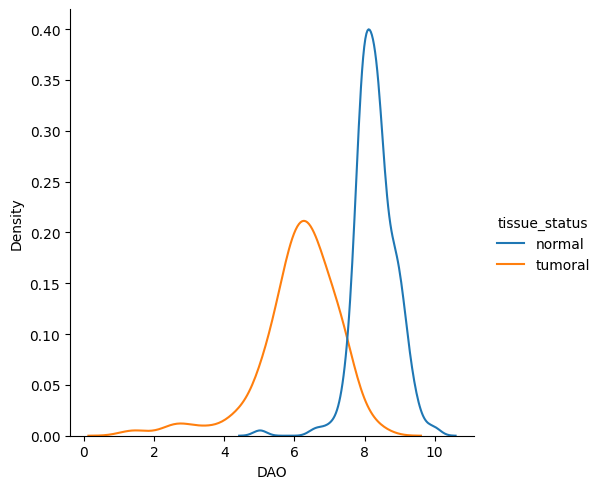

In [ ]:
selected_gene = 'DAO'
sns.displot(data=data, x=selected_gene, hue='tissue_status',kind= 'kde')

In [ ]:
features = ['DAO']
X = data[features] # dataframe (pandas)
X.head(3)
y=data['tissue_status']
y.head(3)

,tissue_status
id_sample,
EPSM-COLON-0001,normal
EPSM-COLON-0002,normal
EPSM-COLON-0003,normal


In [ ]:
X_train,X_test, y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify= y)

In [ ]:
X_train.shape, X_test.shape,y_train.shape, y_test.shape

((562, 1), (242, 1), (562,), (242,))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth=1, random_state=42, criterion='entropy')
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=42)

In [ ]:
classifier_plot_text= export_text(classifier,feature_names=list(X_train.columns))
print(classifier_plot_text)

|--- DAO <= 7.54
|   |--- class: tumoral
|--- DAO >  7.54
|   |--- class: normal



[Text(0.5, 0.75, 'DAO <= 7.54\nentropy = 1.0\nsamples = 562\nvalue = [281, 281]'), Text(0.25, 0.25, 'entropy = 0.24\nsamples = 277\nvalue = [11, 266]'), Text(0.375, 0.5, 'True  '), Text(0.75, 0.25, 'entropy = 0.3\nsamples = 285\nvalue = [270, 15]'), Text(0.625, 0.5, '  False')]


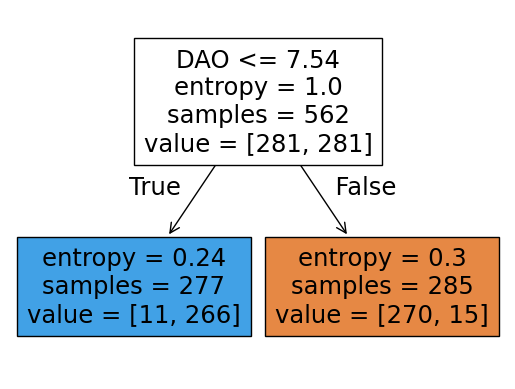

In [ ]:
classifier_plot_tree = plot_tree(classifier,feature_names=list(X_train.columns),filled=True,precision=2)
print(classifier_plot_tree)

In [ ]:
y_pred_test = classifier.predict(X_test)
y_pred_test_accuracy = accuracy_score(y_test, y_pred_test)
y_pred_train = classifier.predict(X_train)
y_pred_train_accuracy = accuracy_score(y_train, y_pred_train)
print('test_accuracy:', y_pred_test_accuracy,'training_accuracy:', y_pred_train_accuracy)

test_accuracy: 0.9297520661157025 training_accuracy: 0.9537366548042705


In [ ]:
def calculate_accuaracy(classifier,X_train,y_train,X_test,y_test):
  y_pred_test = classifier.predict(X_test)
  y_pred_test_accuracy = accuracy_score(y_test, y_pred_test)
  y_pred_train = classifier.predict(X_train)
  y_pred_train_accuracy = accuracy_score(y_train, y_pred_train)
  print('test_accuracy:', y_pred_test_accuracy,'training_accuracy:', y_pred_train_accuracy)
  return y_pred_test_accuracy, y_pred_train_accuracy
calculate_accuaracy(classifier,X_train,y_train,X_test,y_test)


test_accuracy: 0.9297520661157025 training_accuracy: 0.9537366548042705


(0.9297520661157025, 0.9537366548042705)